<a href="https://colab.research.google.com/github/TroJan2001/Artificial-Intelligence/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
#mount drive with google colab notebook
drive.mount('/content/drive/') 

Mounted at /content/drive/


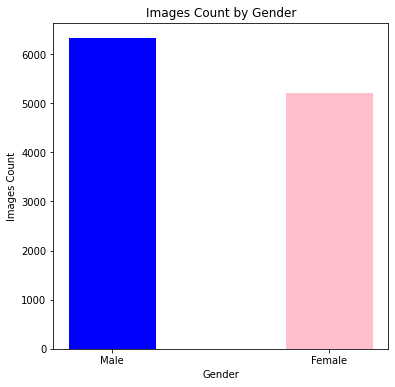

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
#creating the dataset
data = {'Male':6323, 'Female':5202}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (6, 6))
#creating the bar plot of the dataset
c = ['blue', 'pink']
plt.bar(courses, values,color=c,
        width = 0.4)
plt.xlabel("Gender")
plt.ylabel("Images Count")
plt.title("Images Count by Gender")
plt.show()

In [ ]:
import zipfile
import os
#Opens the zip file in read mode
zip_ref = zipfile.ZipFile(r'/content/drive/MyDrive/Colab Notebooks/maleEyes.zip', 'r')    
#Extracts the files into the /maleeyes folder
zip_ref.extractall(r'/content/drive/MyDrive/Colab Notebooks/maleEyes/')                
#Opens the zip file in read mode   
zip_ref1 = zipfile.ZipFile(r'/content/drive/MyDrive/Colab Notebooks/femaleEyes.zip', 'r')
#Extracts the files into the /femaleeyes folder
zip_ref1.extractall(r'/content/drive/MyDrive/Colab Notebooks/femaleEyes/')                
zip_ref.close()
zip_ref1.close()

In [ ]:
import PIL
from PIL import Image
import os
import numpy as np
#folder of maleeyes data
source_folder0 = r"/content/drive/MyDrive/Colab Notebooks/maleEyes/maleeyes"      
#folder of femaleeyes data
source_folder1 = r"/content/drive/MyDrive/Colab Notebooks/femaleEyes/femaleeyes" 
#get path for folders
directorySource0 = os.listdir(source_folder0)
directorySource1 = os.listdir(source_folder1)

In [ ]:
m,m_label,f,f_label=([] for i in range(4))
#resize the images to 48 * 48  
for item in directorySource0:
    #get male image path
    img = Image.open(source_folder0 + r"/" + item)
    #resize the image
    imgResize = img.resize((48, 48), Image.ANTIALIAS)
    #append the resized image as a 3d array to m (48,48,3)
    m.append(np.array(imgResize))
    #append the label (0) to m_label
    m_label.append(0)
    
#convert m_label and m to numpy arrays
m_label=np.array(m_label)
m=np.array(m)

for item in directorySource1:
    #get female image path
    img = Image.open(source_folder1 +r"/"+ item)
    #resize the image
    imgResize = img.resize((48, 48), Image.ANTIALIAS)
    #append the resized image as a 3d array to f (48,48,3)
    f.append(np.array(imgResize))
    #append the label (1) to f_label
    f_label.append(1)

#convert f_label and f to numpy arrays
f_label=np.array(f_label)
f=np.array(f)

(11525, 48, 48, 3)
(11525,)


In [ ]:
import numpy as np
#concatenate m and f vertically
arr=np.concatenate((m,f), axis=0)
#concatenate m_label and f_label vertically
label=np.concatenate((m_label,f_label), axis=0)
#save the arrays to npy files
np.save('/content/drive/MyDrive/Colab Notebooks/images_array', arr)
np.save('/content/drive/MyDrive/Colab Notebooks/labels', label)

In [ ]:
import numpy as np
import random

# load the arrays into arr and label arrays
arr=np.load('/content/drive/MyDrive/Colab Notebooks/images_array.npy')
label=np.load('/content/drive/MyDrive/Colab Notebooks/labels.npy')
#print shape of the data
print(arr.shape)
print(label.shape)

(11525, 48, 48, 3)
(11525,)


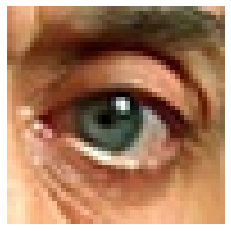

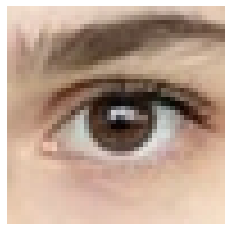

In [ ]:
import random
from matplotlib import pyplot as plt
#generate a random number to get a random male eye image
rand0 = random.randint(0, 6323)
#show 1 male eye image
plt.imshow(arr[rand0], interpolation='nearest')
plt.axis('off')
plt.show()
#generate a random number to get a random female eye image
rand1 = random.randint(6324, 11525)
#show 1 female eye image
plt.imshow(arr[rand1], interpolation='nearest')
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#split the data into train set, test set and validation set with shuffling
x_train_arr,x_test,y_train_arr,y_test = train_test_split(arr,label,test_size=0.25,shuffle=True)
x_train_arr = np.array(x_train_arr)
x_test = np.array(x_test)
x_train,x_valid,y_train,y_valid = train_test_split(x_train_arr,y_train_arr,test_size=0.1,shuffle=True)
#scaling data
x_train = x_train/255
x_valid = x_valid/255
x_test = x_test/255

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense

#make an instance of keras model and add the layers
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(48,48,3)))
model.add(keras.layers.Dense(450, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 6912)              0         
                                                                 
 dense (Dense)               (None, 450)               3110850   
                                                                 
 dense_1 (Dense)             (None, 300)               135300    
                                                                 
 dense_2 (Dense)             (None, 1)                 301       
                                                                 
Total params: 3,246,451
Trainable params: 3,246,451
Non-trainable params: 0
_________________________________________________________________


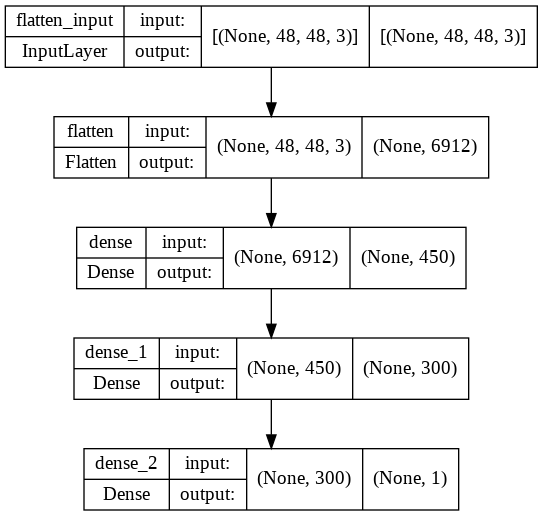

In [ ]:
#plot keras model
keras.utils.plot_model(model,"model.png",show_shapes=True)

In [ ]:
#make adam optimizer
adam = tf.keras.optimizers.Adam(learning_rate=.001)
#compile the model
model.compile(loss="binary_crossentropy",optimizer=adam,metrics=["accuracy"])

In [ ]:
#train the model
history = model.fit(x_train, y_train,validation_data=(x_valid, y_valid), epochs=20)

Epoch 1/20
244/244 [==============================] - 6s 6ms/step - loss: 0.6610 - accuracy: 0.6700 - val_loss: 1.0229 - val_accuracy: 0.5792
Epoch 2/20
244/244 [==============================] - 1s 4ms/step - loss: 0.5263 - accuracy: 0.7386 - val_loss: 0.7233 - val_accuracy: 0.6069
Epoch 3/20
244/244 [==============================] - 1s 4ms/step - loss: 0.4970 - accuracy: 0.7576 - val_loss: 0.4559 - val_accuracy: 0.7873
Epoch 4/20
244/244 [==============================] - 1s 4ms/step - loss: 0.4329 - accuracy: 0.8026 - val_loss: 0.3967 - val_accuracy: 0.8335
Epoch 5/20
244/244 [==============================] - 1s 6ms/step - loss: 0.3935 - accuracy: 0.8258 - val_loss: 0.4936 - val_accuracy: 0.7815
Epoch 6/20
244/244 [==============================] - 1s 5ms/step - loss: 0.3864 - accuracy: 0.8321 - val_loss: 0.3801 - val_accuracy: 0.8289
Epoch 7/20
244/244 [==============================] - 1s 4ms/step - loss: 0.3420 - accuracy: 0.8520 - val_loss: 0.3640 - val_accuracy: 0.8462
Epoch 

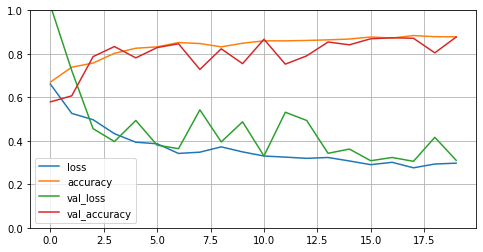

In [ ]:
#plot model scoring
pd.DataFrame(history.history).plot(figsize=(8, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
#evaluate on test set
model.evaluate(x_test, y_test)

91/91 [==============================] - 0s 3ms/step - loss: 0.2902 - accuracy: 0.8716


[0.2902481257915497, 0.8716169595718384]

In [ ]:
#try sgd optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
#compile the model
model.compile(loss="binary_crossentropy",optimizer=sgd,metrics=["accuracy"])

In [ ]:
#train the model
history = model.fit(x_train, y_train,validation_data=(x_valid, y_valid), epochs=20)

Epoch 1/20
244/244 [==============================] - 1s 4ms/step - loss: 0.2445 - accuracy: 0.8997 - val_loss: 0.4131 - val_accuracy: 0.8208
Epoch 2/20
244/244 [==============================] - 1s 4ms/step - loss: 0.2433 - accuracy: 0.9004 - val_loss: 0.4789 - val_accuracy: 0.7815
Epoch 3/20
244/244 [==============================] - 1s 3ms/step - loss: 0.2411 - accuracy: 0.9004 - val_loss: 0.2961 - val_accuracy: 0.8821
Epoch 4/20
244/244 [==============================] - 1s 4ms/step - loss: 0.2382 - accuracy: 0.9031 - val_loss: 0.2927 - val_accuracy: 0.8821
Epoch 5/20
244/244 [==============================] - 1s 4ms/step - loss: 0.2380 - accuracy: 0.9032 - val_loss: 0.2927 - val_accuracy: 0.8786
Epoch 6/20
244/244 [==============================] - 1s 4ms/step - loss: 0.2368 - accuracy: 0.9040 - val_loss: 0.2898 - val_accuracy: 0.8786
Epoch 7/20
244/244 [==============================] - 1s 3ms/step - loss: 0.2345 - accuracy: 0.9059 - val_loss: 0.3028 - val_accuracy: 0.8879
Epoch 

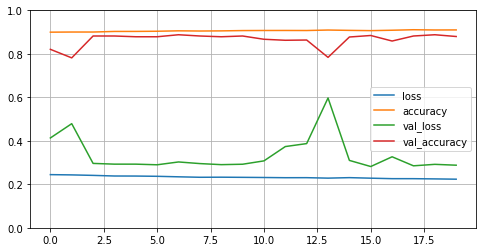

In [ ]:
#plot model scoring
pd.DataFrame(history.history).plot(figsize=(8, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
#evaluate on test set
model.evaluate(x_test, y_test)

91/91 [==============================] - 0s 2ms/step - loss: 0.2663 - accuracy: 0.8893


[0.26628243923187256, 0.8893129825592041]

In [ ]:
# try another model (pretrained model)
from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(input_shape=(48, 48,3), include_top=False, weights="imagenet")
for layer in base_model.layers:
    layer.trainable = False
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(1, activation='sigmoid'))



94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
#compile the model
base_model.compile(optimizer = "sgd", loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
#train the model
resnet_history = base_model.fit(x_train,y_train,validation_data=(x_valid, y_valid), steps_per_epoch = 100, epochs = 15)

Epoch 1/15
100/100 [==============================] - 32s 125ms/step - loss: 0.4531 - acc: 0.8312 - val_loss: 0.7248 - val_acc: 0.4335
Epoch 2/15
100/100 [==============================] - 8s 77ms/step - loss: 0.1342 - acc: 0.9499 - val_loss: 4.4351 - val_acc: 0.5665
Epoch 3/15
100/100 [==============================] - 10s 104ms/step - loss: 0.0502 - acc: 0.9825 - val_loss: 7.9735 - val_acc: 0.5665
Epoch 4/15
100/100 [==============================] - 9s 89ms/step - loss: 0.0208 - acc: 0.9946 - val_loss: 22.2243 - val_acc: 0.5665
Epoch 5/15
100/100 [==============================] - 8s 82ms/step - loss: 0.0106 - acc: 0.9981 - val_loss: 8.8942 - val_acc: 0.5665
Epoch 6/15
100/100 [==============================] - 9s 94ms/step - loss: 0.0064 - acc: 0.9990 - val_loss: 10.5691 - val_acc: 0.5665
Epoch 7/15
100/100 [==============================] - 8s 77ms/step - loss: 0.0053 - acc: 0.9992 - val_loss: 5.0852 - val_acc: 0.5723
Epoch 8/15
100/100 [==============================] - 7s 75ms/s

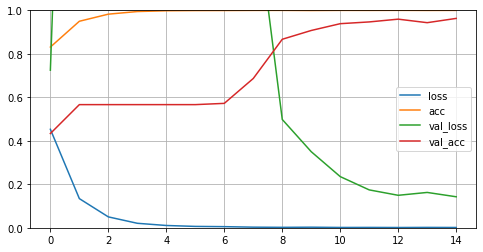

In [ ]:
#plot model scoring
pd.DataFrame(resnet_history.history).plot(figsize=(8, 4))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
#evaluate on test set
base_model.evaluate(x_test, y_test)

91/91 [==============================] - 2s 20ms/step - loss: 0.1827 - acc: 0.9490


[0.1826963722705841, 0.9489937424659729]

True values are:  [0 1]
Predicted values are:  [[7.4905925e-05]
 [9.9999976e-01]]
Predicted rounded values are:  [[0]
 [1]]


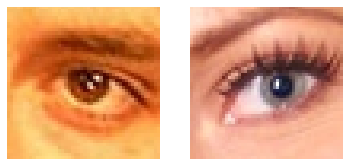

In [ ]:
import random
#x_test size = 2882
#observe the predicitons of Resnet50 model of a random sample
randx = random.randint(0, 2882)
x_new = x_test[randx:randx+2]
y_new = y_test[randx:randx+2]
y_predict = base_model.predict(x_new)
print("True values are: " , y_new)
print("Predicted values are: " , y_predict)
print("Predicted rounded values are: ", (y_predict.round(1)).astype(int))
f, axarr = plt.subplots(1,2)
axarr[0].imshow(x_new[0], interpolation='nearest')
axarr[0].axis('off')
axarr[1].imshow(x_new[1], interpolation='nearest')
axarr[1].axis('off')
plt.show()
